In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy import interpolate
import re,glob,os
#%matplotlib inline

# plot style
plot_style = {'notebook':'../include/notebook.mplstyle','aps':'../include/aps.mplstyle'}
plt.style.reload_library()
plt.style.use(plot_style['aps'])
figsize = plt.rcParams['figure.figsize']
plt.rcParams['text.latex.preamble'] = f'\input{{{os.getcwd()}/../include/texheader}}'
import dgutils.colors as colortools


load data

In [2]:
PhaseDiagramDat = np.loadtxt("../data/phase_diagram.txt", delimiter = ",")

plotting

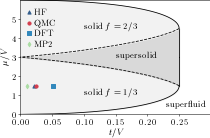

In [3]:
colors = ["#d43e4e", "#abdda4", "#3288bc", "#6a006a"]
cmap = plt.cm.get_cmap('viridis')
colors2 = [cmap(i*0.3) for i in range(4)]

plt.plot(PhaseDiagramDat[:,0], PhaseDiagramDat[:,1], color = 'black', linewidth = 0.8)
plt.plot(PhaseDiagramDat[:,2], PhaseDiagramDat[:,3], color = 'black', linewidth = 0.8, linestyle = "--")
plt.plot(PhaseDiagramDat[:,4], PhaseDiagramDat[:,5], color = 'black', linewidth = 0.8)
plt.plot(PhaseDiagramDat[:,0], -PhaseDiagramDat[:,1]+6, color = 'black', linewidth = 0.8)
plt.plot(PhaseDiagramDat[:,2], -PhaseDiagramDat[:,3]+6, color = 'black', linewidth = 0.8, linestyle = "--")
plt.plot(PhaseDiagramDat[:,4], -PhaseDiagramDat[:,5]+6, color = 'black', linewidth = 0.8)

ax = plt.gca()
#ax.set_facecolor("#f2f2f2")

plt.fill_between(PhaseDiagramDat[:,4], PhaseDiagramDat[:,5], 1.5, color = "#f2f2f2")
plt.fill_between(PhaseDiagramDat[:,2], 1.5, PhaseDiagramDat[:,3], color = "#f2f2f2")

plt.fill_between(PhaseDiagramDat[:,2], PhaseDiagramDat[:,3], -PhaseDiagramDat[:,3]+6, color = "#d9d9d9")

plt.fill_between(PhaseDiagramDat[:,2], -PhaseDiagramDat[:,3]+6, 4.5, color = "#f2f2f2")
plt.fill_between(PhaseDiagramDat[:,4], 4.5, -PhaseDiagramDat[:,5]+6, color = "#f2f2f2")

ax.scatter(0.021, 1.5, color = colors2[1], s = 10, label = "HF", marker = '^')
ax.scatter(0.025, 1.5, color = colors[0], s = 10, label = "QMC")
ax.scatter(0.051, 1.5, color = colors[2], s = 10, label = "DFT", marker = 's')
ax.scatter(0.011, 1.5, color = colors[1], s = 10, label = "MP2", marker = 'd')

plt.legend()

plt.text(0.23,0.4, 'superfluid')
plt.text(0.15,3, 'supersolid')
plt.text(0.1,1.0, r'solid $f = 1/3$')
plt.text(0.1,4.5, r'solid $f = 2/3$')

plt.xlim(0, 0.299)
plt.ylim(0, 5.999)

plt.xlabel(r'$t/V$')
plt.ylabel(r'$\mu/V$')

plt.savefig('../plots/phase_diagram.pdf', dpi=300, transparent=False, bbox_inches ='tight') 
plt.savefig('../plots/phase_diagram.svg', bbox_inches ='tight') 
plt.show()

## Alternate: Combined Results + Phase Diagram

In [100]:
props = {}
props['HF'] = {'mfc':'White', 'mec':colors[0], 'ms':3, 'label':'HF', 'marker':'^', 'mew':0.6,'zorder':-2, 'lw':0}
props['QMC'] = {'mfc':colortools.get_alpha_hex(colors[0],0.8), 'mec':colors[0], 'ms':3, 'label':'QMC', 'marker':'o', 'mew':0.6,'zorder':2, 'lw':0}
props['DFT'] = {'mfc':colortools.get_alpha_hex(colors[2],0.8), 'mec':colors[2], 'ms':3, 'label':'DFT', 'marker':'s', 'mew':0.6,'zorder':-2, 'lw':0}
props['MP2'] = {'mfc':colortools.get_alpha_hex(colors[1],0.8), 'mec':colors[1], 'ms':3, 'label':'MP2', 'marker':'D', 'mew':0.6,'zorder':-2, 'lw':0}

methods = ['HF','QMC','DFT','MP2']

toV = {'HF':0.021, 'QMC':0.025 , 'DFT':0.051, 'MP2':0.011}

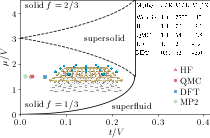

In [101]:
colors = ["#d43e4e", "#abdda4", "#3288bc", "#6a006a"]
cmap = plt.cm.get_cmap('viridis')
colors2 = [cmap(i*0.3) for i in range(4)]

fig,ax = plt.subplots()

ax.plot(PhaseDiagramDat[:,0], PhaseDiagramDat[:,1], color = 'black', linewidth = 0.8)
ax.plot(PhaseDiagramDat[:,2], PhaseDiagramDat[:,3], color = 'black', linewidth = 0.8, linestyle = "--")
ax.plot(PhaseDiagramDat[:,4], PhaseDiagramDat[:,5], color = 'black', linewidth = 0.8)
ax.plot(PhaseDiagramDat[:,0], -PhaseDiagramDat[:,1]+6, color = 'black', linewidth = 0.8)
ax.plot(PhaseDiagramDat[:,2], -PhaseDiagramDat[:,3]+6, color = 'black', linewidth = 0.8, linestyle = "--")
ax.plot(PhaseDiagramDat[:,4], -PhaseDiagramDat[:,5]+6, color = 'black', linewidth = 0.8)

# ax.scatter(0.021, 1.5, edgecolor = colors[0], color='None', s = 12, label = "HF", marker = '^', linewidths=0.6)
# ax.scatter(0.025, 1.5, color = colors[0], s = 10, label = "QMC")
# ax.scatter(0.051, 1.5, color = colors[2], s = 10, label = "DFT", marker = 's')
# ax.scatter(0.011, 1.5, color = colors[1], s = 9, label = "MP2", marker = 'D')

## Plot the raw data as points
for method in methods:
    ax.plot(toV[method],1.5,**props[method])


plt.legend(loc='lower right', markerscale=0.8)


im = plt.imread('../plots/results_table.png',format='png')
newax = fig.add_axes([0.535, 0.52, 0.42, 0.353])
newax.imshow(im,interpolation='none')
newax.axis('off')

im = plt.imread('../plots/graphene_cell.png',format='png')
newax1 = fig.add_axes([0.1425, 0.265, 0.5, 0.19])
newax1.imshow(im,interpolation='none', zorder=-10)
newax1.axis('off')

ax.text(0.2,0.3, 'superfluid', va='center')
ax.text(0.14,3, 'supersolid', va='center')
ax.text(0.01,0.3, r'solid $f = 1/3$')
ax.text(0.01,4.2, r'solid $f = 2/3$')

ax.set_xlim(0, 0.415)
ax.set_ylim(0, 4.5)

ax.set_xlabel(r'$t/V$')
ax.set_ylabel(r'$\mu/V$')

plt.savefig('../plots/phase_diagram_data.pdf', dpi=300, transparent=False, bbox_inches ='tight') 
#plt.savefig('../plots/phase_diagram.svg', bbox_inches ='tight') 
plt.show()

In [95]:
table_factor = 8620/7240 

In [96]:
0.42/table_factor

0.35276102088167055

In [97]:
cell_factor = 3206/1196

In [98]:
0.5/cell_factor

0.18652526512788523